In [ ]:
#Checking that flag plot arrays are being made correctly

In [3]:
#Init

import glob
from hera_qm import xrfi as xrfi
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import numpy as np
import numpy.ma as ma
import os
from pyuvdata import UVData
import sys
from hera_qm import xrfi as xrfi

#Librarian init, to be added
# import hera_librarian
#
#
#
np.set_printoptions(threshold='nan')
Data_Path='/lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140'
uv=UVData()
ant1=1
ant2=11

In [4]:
file_flag_xx=[]
file_flag_yy=[]
time_mean_xx=[]
time_mean_yy=[]
flag_times_xx=[]
flag_times_yy=[]
chan_mean_xx=[]
chan_mean_yy=[]
flag_waterfall_xx=[]
flag_waterfall_yy=[]

#get flag files, extract info
file_flag_xx=glob.glob(Data_Path+'/*.xx.*.flags.npz')
file_flag_xx.sort()
file_flag_yy=glob.glob(Data_Path+'/*.yy.*.flags.npz')
file_flag_yy.sort()

for i,flagfile in enumerate(file_flag_xx):
    print ('Loading ' + flagfile)
    flag_data=np.load(flagfile)
    timelen=len(flag_data['waterfall'])
    time_mean_xx.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
    chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
    numbaseline=len(chan_mean_temp)/timelen
    chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
    chan_mean_xx.extend(np.mean(chantemp, axis=1))
    waterfalltempxx=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
    flag_waterfall_xx.extend(np.average(waterfalltempxx, axis=1).squeeze())
    
for i,flagfile in enumerate(file_flag_yy):
    print ('Loading ' + flagfile)
    flag_data=np.load(flagfile)
    timelen=len(flag_data['waterfall'])
    time_mean_yy.append(np.mean(flag_data['flag_array'],axis=(0,1,3)))
    chan_mean_temp=np.mean(flag_data['flag_array'], axis=(1,2,3))
    numbaseline=len(chan_mean_temp)/timelen
    chantemp=np.reshape(chan_mean_temp,(timelen, numbaseline))
    chan_mean_yy.extend(np.mean(chantemp, axis=1))
    waterfalltempyy=np.reshape(flag_data['flag_array'], (timelen, numbaseline, 1,1024,1))
    flag_waterfall_yy.extend(np.average(waterfalltempyy, axis=1).squeeze())
    
time_mean_xx=np.mean(time_mean_xx, axis=0)
time_mean_yy=np.mean(time_mean_yy, axis=0)

Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.12564.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.13310.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.14056.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.14801.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.15547.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.16293.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.17038.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.17784.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.18530.xx.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.19275.xx.HH.uvO.flags.npz
Loading /l

Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.20021.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.20767.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.21512.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.22258.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.23004.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.23749.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.24495.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.25241.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.25986.yy.HH.uvO.flags.npz
Loading /lustre/aoc/projects/hera/djacobs/IDR2_flags/2458140/zen.2458140.26732.yy.HH.uvO.flags.npz
Loading /l

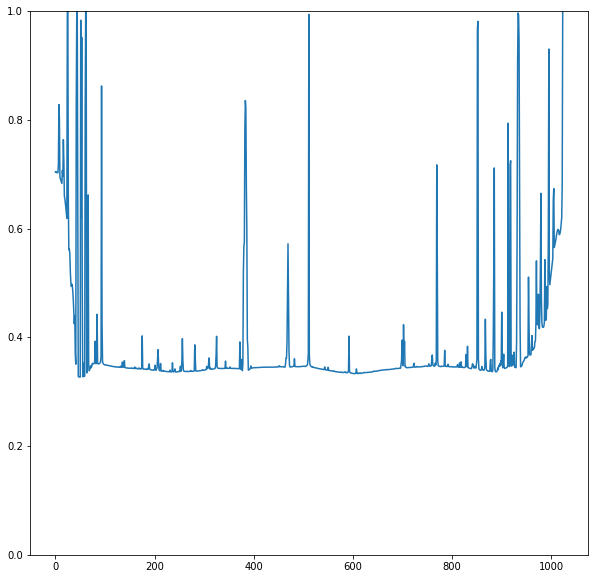

In [33]:
plt.figure(figsize=(10,10))
plt.plot(time_mean_xx)
plt.ylim(0,1)
plt.show()

In [132]:
testarr=np.load('/lustre/aoc/projects/hera//H1C_IDR2/2458140/zen.2458140.12564.yy.HH.uvO.flags.npz')
testarrG=np.load('/lustre/aoc/projects/hera/H1C_IDR2/2458140/zen.2458140.12564.HH.uv.omni.calfits.g.flags.npz')
testarrX=np.load('/lustre/aoc/projects/hera/H1C_IDR2/2458140/zen.2458140.12564.HH.uv.omni.calfits.x.flags.npz')
testarrV=np.load('/lustre/aoc/projects/hera/H1C_IDR2/2458140/zen.2458140.12564.HH.uv.vis.uvfits.flags.npz')


In [101]:
print testarr.files
print testarrG.files
print testarrX.files
print testarrV.files

['waterfall', 'flag_array', 'history']
['waterfall', 'flag_array', 'history']
['waterfall', 'flag_array', 'history']
['waterfall', 'flag_array', 'history']


In [113]:
print np.max(testarr['waterfall'])

False


In [102]:
print testarr['flag_array'].shape
print testarrG['flag_array'].shape
print testarrX['flag_array'].shape
print testarrV['flag_array'].shape

(113460, 1, 1024, 1)
(50, 1, 1024, 60, 2)
(50, 1, 1024, 60, 2)
(6780, 1, 1024, 2)


In [133]:
testmeanG=np.mean(testarrG['flag_array'], axis=(0,1,3))
print testmeanG.shape
print testmeanG[0][0]
testmeanX=np.mean(testarrX['flag_array'], axis=(0,1,3))
print testmeanX.shape
print testmeanX[0][0]
testmeanV=np.mean(testarrV['flag_array'], axis=(0,1))
print testmeanV.shape
print testmeanV[0][0]

(1024, 2)
0.0026666666666666666
(1024, 2)
0.25966666666666666
(1024, 2)
0.11032448377581121


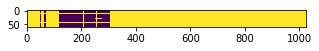

In [139]:
plt.figure(figsize=(5,5))
plt.imshow(testarrX['waterfall'])
plt.show()

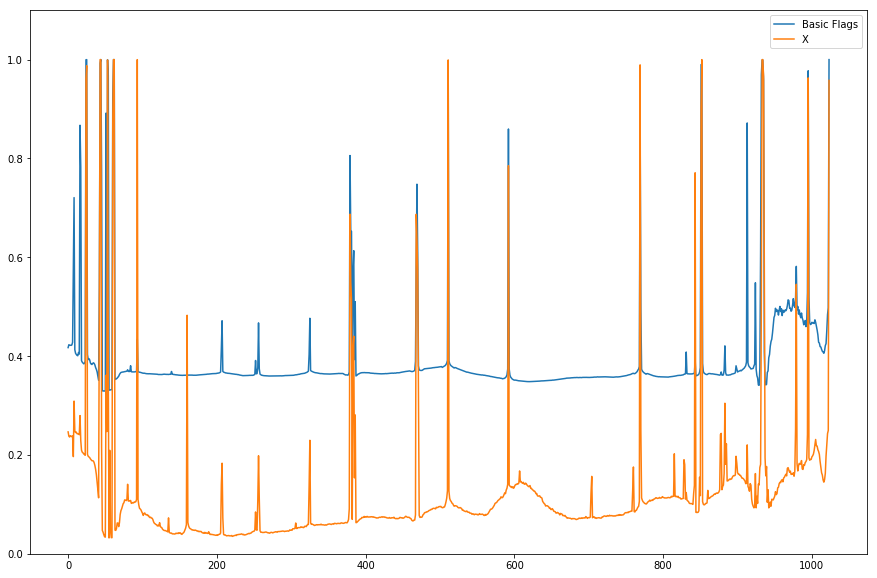

In [134]:
plt.figure(figsize=(15,10))
plt.plot(np.mean(testarr['flag_array'], axis=(0,1,3)), label='Basic Flags')
#plt.plot(testmeanG[:,1],label='G')
plt.plot(testmeanX[:,1],label='X')
#plt.plot(testmeanV[:,1],label='V')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [32]:
print testarr['flag_array'].shape

(113460, 1, 1024, 1)


In [36]:
113460/1891

60

In [140]:
uv=UVData()
uv.read_miriad('/lustre/aoc/projects/hera/H1C_IDR2/2458140/zen.2458140.12564.yy.HH.uvOR')


In [141]:
testflagarr=uv.flag_array

In [142]:
print testflagarr.shape

(113460, 1, 1024, 1)


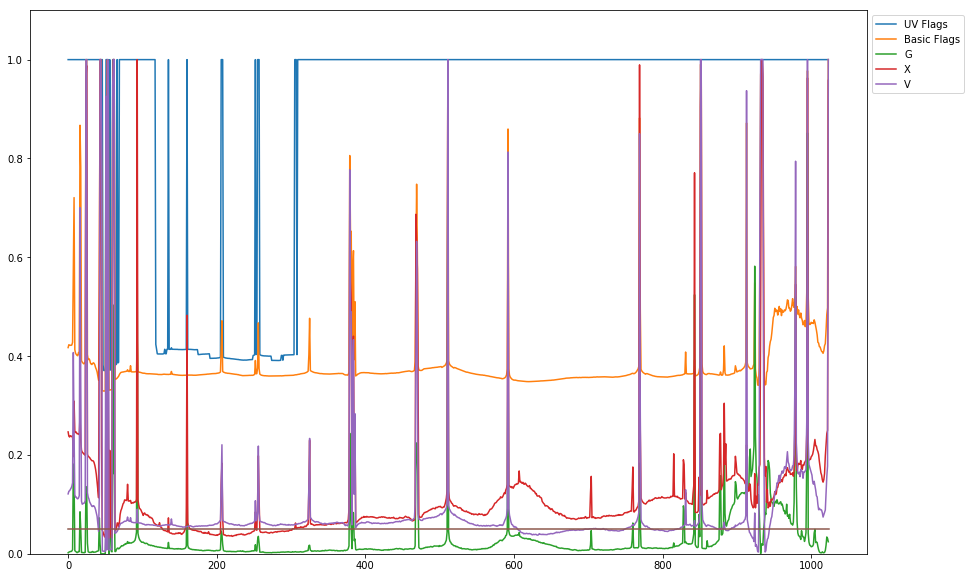

In [147]:
plt.figure(figsize=(15,10))
plt.plot(np.mean(testflagarr, axis=(0,1,3)), label='UV Flags')
plt.plot(np.mean(testarr['flag_array'], axis=(0,1,3)), label='Basic Flags')
plt.plot(testmeanG[:,1],label='G')
plt.plot(testmeanX[:,1],label='X')
plt.plot(testmeanV[:,1],label='V')
plt.plot([0,1024],[.05,.05])
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0,1.1)
plt.show()

In [45]:
np.array_equal(testarr['flag_array'],testflagarr)

False

In [128]:
DATA_PATH='/lustre/aoc/projects/hera//H1C_IDR2/2458101'
testarr=np.load(DATA_PATH + '/zen.'+DATA_PATH[-7:]+'.12552.yy.HH.uvO.flags.npz')
testarrG=np.load(DATA_PATH + '/zen.'+DATA_PATH[-7:]+'.12552.HH.uv.omni.calfits.g.flags.npz')
testarrX=np.load(DATA_PATH + '/zen.'+DATA_PATH[-7:]+'.12552.HH.uv.omni.calfits.x.flags.npz')
testarrV=np.load(DATA_PATH + '/zen.'+DATA_PATH[-7:]+'.12552.HH.uv.vis.uvfits.flags.npz')
uv=UVData()
uv.read_miriad(DATA_PATH + '/zen.'+DATA_PATH[-7:]+'.12552.yy.HH.uvOR')
testflagarr=uv.flag_array

In [129]:
testmeanG=np.mean(testarrG['flag_array'], axis=(0,1,3))
print testmeanG.shape
print testmeanG[0][0]
testmeanX=np.mean(testarrX['flag_array'], axis=(0,1,3))
print testmeanX.shape
print testmeanX[0][0]
testmeanV=np.mean(testarrV['flag_array'], axis=(0,1))
print testmeanV.shape
print testmeanV[0][0]

(1024, 2)
1.0
(1024, 2)
1.0
(1024, 2)
1.0


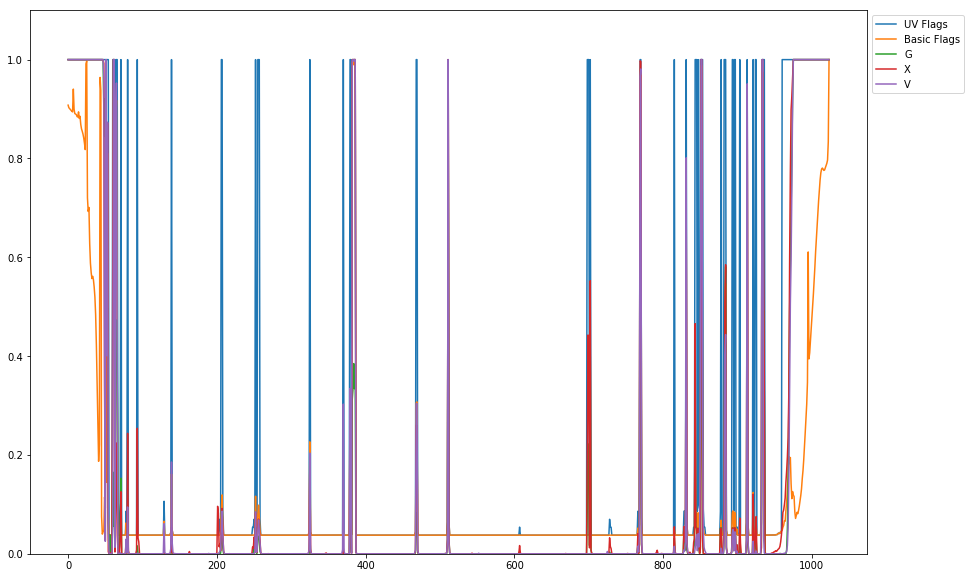

In [130]:
plt.figure(figsize=(15,10))
plt.plot(np.mean(testflagarr, axis=(0,1,3)), label='UV Flags')
plt.plot(np.mean(testarr['flag_array'], axis=(0,1,3)), label='Basic Flags')
plt.plot(testmeanG[:,1],label='G')
plt.plot(testmeanX[:,1],label='X')
plt.plot(testmeanV[:,1],label='V')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0,1.1)
plt.show()

In [153]:
testfile=np.load('/lustre/aoc/projects/hera/dlewis/FullSeason_flag_summaries/2458026/zen.2458026.25516.xx.HH.uvO.flag_summary.npz')
print testfile.files
print testfile['times']

['version', 'tmean', 'tmin', 'fstd', 'pols', 'fmax', 'tmax', 'tstd', 'freqs', 'times', 'fmean', 'waterfall', 'fmin', 'tmedian', 'fmedian']
[2458026.25516438 2458026.25528865 2458026.25541293 2458026.2555372
 2458026.25566148 2458026.25578576 2458026.25591003 2458026.25603431
 2458026.25615858 2458026.25628286 2458026.25640713 2458026.25653141
 2458026.25665568 2458026.25677996 2458026.25690424 2458026.25702851
 2458026.25715279 2458026.25727706 2458026.25740134 2458026.25752561
 2458026.25764989 2458026.25777417 2458026.25789844 2458026.25802272
 2458026.25814699 2458026.25827127 2458026.25839554 2458026.25851982
 2458026.2586441  2458026.25876837 2458026.25889265 2458026.25901692
 2458026.2591412  2458026.25926547 2458026.25938975 2458026.25951403
 2458026.2596383  2458026.25976258 2458026.25988685 2458026.26001113
 2458026.2601354  2458026.26025968 2458026.26038396 2458026.26050823
 2458026.26063251 2458026.26075678 2458026.26088106 2458026.26100533
 2458026.26112961 2458026.26125388